In [1]:
import numpy as np
import pandas as pd
import os
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import sklearn
print(os.listdir("data/movie"))


['._links.csv', '._movies.csv', '._ratings.csv', '._tags.csv', 'links.csv', 'movies.csv', 'ratings.csv', 'tags.csv']


In [2]:
movie = pd.read_csv("data/movie/movies.csv")

In [3]:
ratings = pd.read_csv("data/movie/ratings.csv")

In [4]:
tag = pd.read_csv("data/movie/tags.csv")

In [5]:
movie.sample()

,movieId,title,genres
59,60,"Indian in the Cupboard, The (1995)",Adventure|Children|Fantasy


In [6]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
print(type(movie))


<class 'pandas.core.frame.DataFrame'>


In [8]:
movie.describe()

,movieId
count,27278.000000
mean,59855.480570
std,44429.314697
min,1.000000
25%,6931.250000
50%,68068.000000
75%,100293.250000
max,131262.000000


In [9]:
movie.info

<bound method DataFrame.info of        movieId                                              title  \
0            1                                   Toy Story (1995)   
1            2                                     Jumanji (1995)   
2            3                            Grumpier Old Men (1995)   
3            4                           Waiting to Exhale (1995)   
4            5                 Father of the Bride Part II (1995)   
5            6                                        Heat (1995)   
6            7                                     Sabrina (1995)   
7            8                                Tom and Huck (1995)   
8            9                                Sudden Death (1995)   
9           10                                   GoldenEye (1995)   
10          11                     American President, The (1995)   
11          12                 Dracula: Dead and Loving It (1995)   
12          13                                       Balto (1995)   
13

In [10]:
print(movie.shape)
print(ratings.shape)
print(tag.shape)

(27278, 3)
(20000263, 4)
(465564, 4)


In [11]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [12]:
tag.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [13]:
rows = tag.iloc[0]
type(rows)
print(rows)

userId                18
movieId             4141
tag          Mark Waters
timestamp     1240597180
Name: 0, dtype: object


In [14]:
rows.index


Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')

In [15]:
tag.columns


Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')

In [16]:
movie.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [17]:
ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [18]:
ratings['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [19]:
ratings['rating'].mean()

3.5255285642993797

In [20]:
ratings['rating'].min

<bound method Series.min of 0           3.5
1           3.5
2           3.5
3           3.5
4           3.5
5           3.5
6           4.0
7           4.0
8           4.0
9           4.0
10          4.0
11          4.0
12          4.0
13          3.5
14          3.5
15          4.0
16          3.5
17          3.5
18          3.0
19          3.5
20          3.5
21          3.5
22          4.0
23          4.0
24          3.5
25          3.5
26          4.0
27          4.0
28          3.5
29          3.5
           ... 
20000233    3.5
20000234    3.5
20000235    4.5
20000236    4.5
20000237    4.0
20000238    4.0
20000239    4.0
20000240    3.0
20000241    4.0
20000242    4.0
20000243    4.5
20000244    5.0
20000245    5.0
20000246    3.0
20000247    3.0
20000248    4.5
20000249    4.0
20000250    3.0
20000251    5.0
20000252    4.0
20000253    4.5
20000254    4.0
20000255    4.5
20000256    4.5
20000257    4.5
20000258    4.5
20000259    4.5
20000260    3.0
20000261    5.0
20000262    

In [21]:
ratings['rating'].std

<bound method Series.std of 0           3.5
1           3.5
2           3.5
3           3.5
4           3.5
5           3.5
6           4.0
7           4.0
8           4.0
9           4.0
10          4.0
11          4.0
12          4.0
13          3.5
14          3.5
15          4.0
16          3.5
17          3.5
18          3.0
19          3.5
20          3.5
21          3.5
22          4.0
23          4.0
24          3.5
25          3.5
26          4.0
27          4.0
28          3.5
29          3.5
           ... 
20000233    3.5
20000234    3.5
20000235    4.5
20000236    4.5
20000237    4.0
20000238    4.0
20000239    4.0
20000240    3.0
20000241    4.0
20000242    4.0
20000243    4.5
20000244    5.0
20000245    5.0
20000246    3.0
20000247    3.0
20000248    4.5
20000249    4.0
20000250    3.0
20000251    5.0
20000252    4.0
20000253    4.5
20000254    4.0
20000255    4.5
20000256    4.5
20000257    4.5
20000258    4.5
20000259    4.5
20000260    3.0
20000261    5.0
20000262    

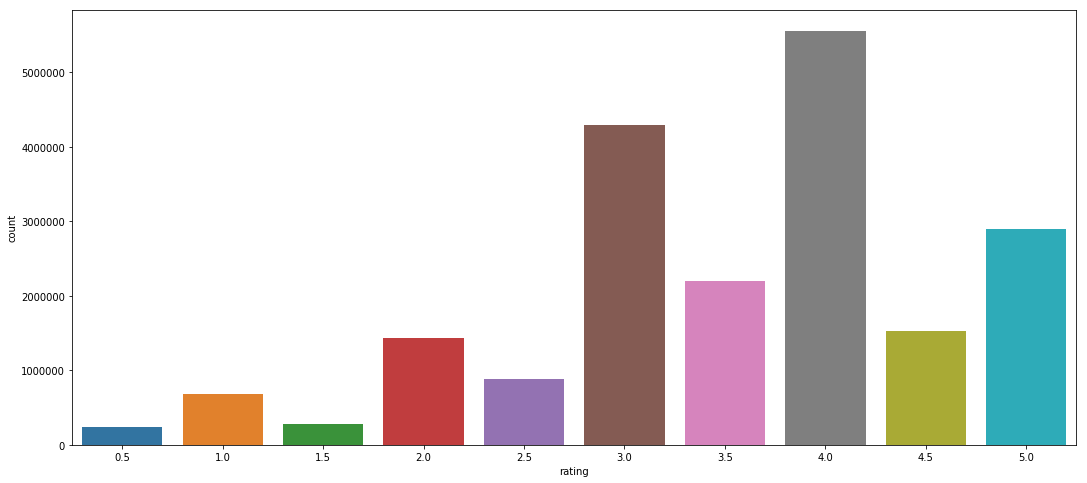

In [22]:
plt.figure(figsize=(18,8))
sns.countplot(x = 'rating', data= ratings) #movieId

In [23]:
filter1= ratings['rating'] > 5
print(filter1)
filter1.any()

0           False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
            ...  
20000233    False
20000234    False
20000235    False
20000236    False
20000237    False
20000238    False
20000239    False
20000240    False
20000241    False
20000242    False
20000243    False
20000244    False
20000245    False
20000246    False
20000247    False
20000248    False
20000249    False
20000250    False
20000251    False
20000252    False
20000253    False
20000254    False
20000255    False
20000256    False
20000257  

False

In [24]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [25]:
ratings.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

In [26]:
tag.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


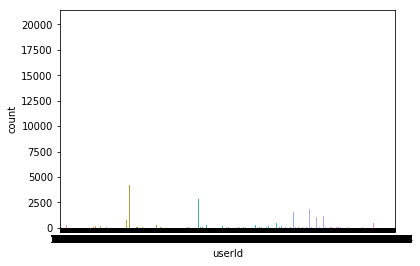

In [27]:
sns.countplot(x='userId', data=tag)

In [28]:
filter2 = ratings['rating']> 0
filter2.all()

True

# `Data Cleaning`

In [29]:
movie.isnull().any()


movieId    False
title      False
genres     False
dtype: bool

In [30]:
tag.isnull().any()

userId       False
movieId      False
tag           True
timestamp    False
dtype: bool

In [31]:
tags = tag.dropna()

In [32]:
tags.isnull().any()

userId       False
movieId      False
tag          False
timestamp    False
dtype: bool

In [33]:
tags.shape

(465548, 4)

C:\Users\student\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


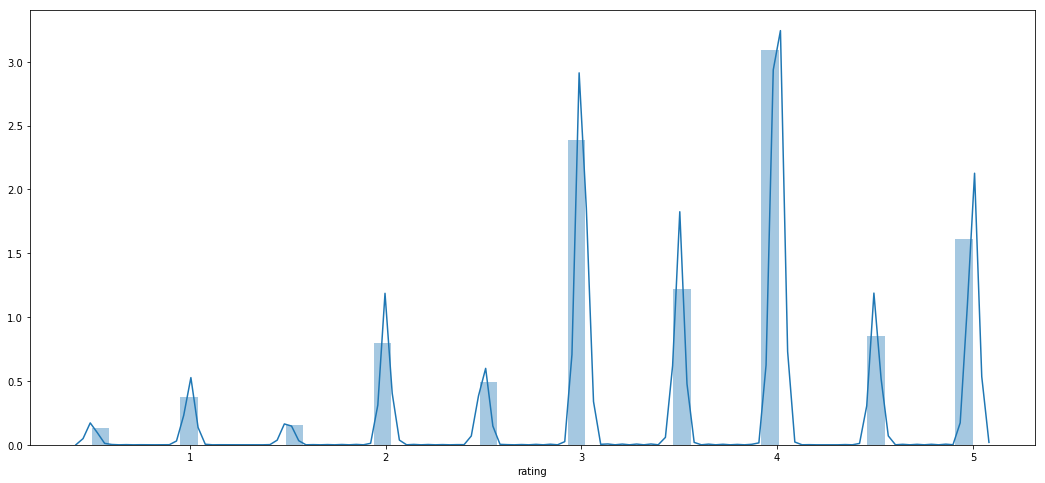

In [34]:
plt.figure(figsize=(18,8))
sns.distplot(ratings['rating']) #movieId

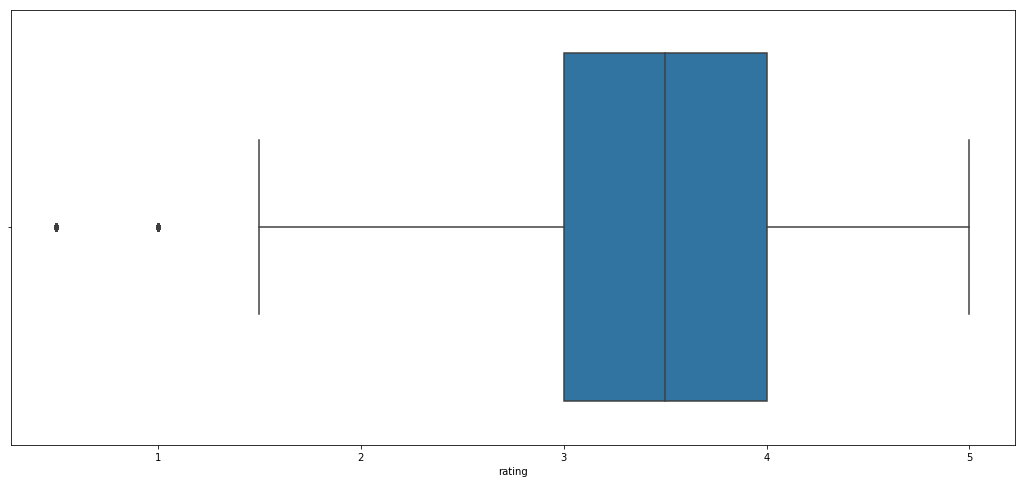

In [35]:
plt.figure(figsize=(18,8))
sns.boxplot(ratings['rating']) #movieId

In [36]:
movie.columns


Index(['movieId', 'title', 'genres'], dtype='object')

In [37]:
movie[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [38]:
ratings[-10:]

,userId,movieId,rating,timestamp
20000253,138493,60816,4.5,1259865163
20000254,138493,61160,4.0,1258390537
20000255,138493,65682,4.5,1255816373
20000256,138493,66762,4.5,1255805408
20000257,138493,68319,4.5,1260209720
20000258,138493,68954,4.5,1258126920
20000259,138493,69526,4.5,1259865108
20000260,138493,69644,3.0,1260209457
20000261,138493,70286,5.0,1258126944
20000262,138493,71619,2.5,1255811136


In [39]:
tag_counts = tags['tag'].value_counts()

In [46]:
tag_counts.head

<bound method NDFrame.head of sci-fi                                               3384
based on a book                                      3281
atmospheric                                          2917
comedy                                               2779
action                                               2657
surreal                                              2427
BD-R                                                 2334
twist ending                                         2323
funny                                                2072
dystopia                                             1991
stylized                                             1941
quirky                                               1906
dark comedy                                          1899
classic                                              1769
psychology                                           1754
fantasy                                              1703
time travel                               

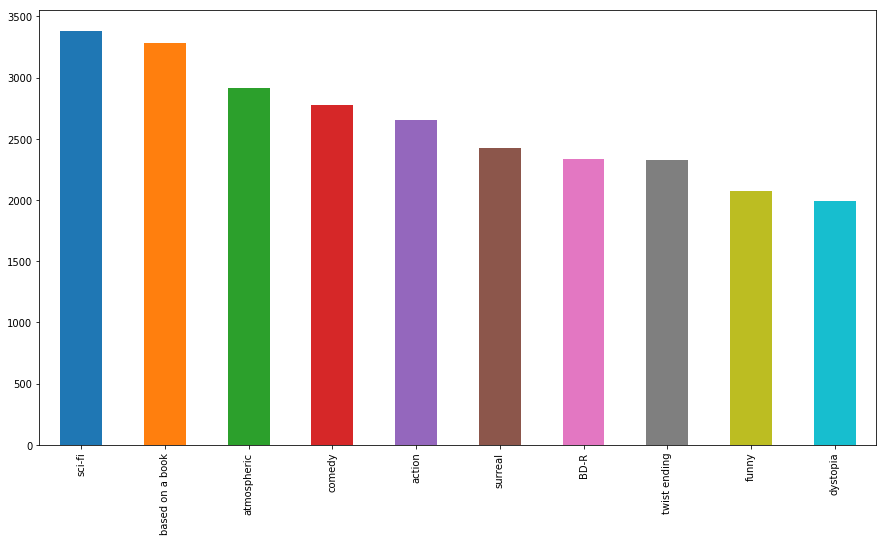

In [47]:
plt.figure(figsize=(15,8))
tag_counts[:10].plot(kind='bar')

# Filter for selecting Row

In [48]:
highly_rated = ratings['rating'] >=4.0
ratings[highly_rated][30:50]

,userId,movieId,rating,timestamp
68,1,2021,4.0,1112485929
69,1,2100,4.0,1112485955
70,1,2118,4.0,1094786092
71,1,2138,4.0,1112485789
72,1,2140,4.0,1112485705
73,1,2143,4.0,1112485951
74,1,2173,4.0,1112485887
75,1,2174,4.0,1112485843
76,1,2193,4.0,1112485753
79,1,2288,4.0,1094786077


# `Declaring Animation movie`

In [51]:
is_Animation = movie['genres'].str.contains('Animation')
movie[is_Animation][5:15]

,movieId,title,genres
310,313,"Swan Princess, The (1994)",Animation|Children
360,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
388,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation
547,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
553,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy
582,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
588,594,Snow White and the Seven Dwarfs (1937),Animation|Children|Drama|Fantasy|Musical
589,595,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX
590,596,Pinocchio (1940),Animation|Children|Fantasy|Musical
604,610,Heavy Metal (1981),Action|Adventure|Animation|Horror|Sci-Fi


In [52]:
movie['Animation_Movie'] = movie['genres'].str.contains('Animation')

In [53]:
movie.head()

,movieId,title,genres,Animation_Movie
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,True
1,2,Jumanji (1995),Adventure|Children|Fantasy,False
2,3,Grumpier Old Men (1995),Comedy|Romance,False
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,False
4,5,Father of the Bride Part II (1995),Comedy,False


In [56]:
movie[['title','Animation_Movie']].head()

,title,Animation_Movie
0,Toy Story (1995),True
1,Jumanji (1995),False
2,Grumpier Old Men (1995),False
3,Waiting to Exhale (1995),False
4,Father of the Bride Part II (1995),False


In [57]:
movie[is_Animation].head(15)

,movieId,title,genres,Animation_Movie
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,True
12,13,Balto (1995),Adventure|Animation|Children,True
47,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance,True
236,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance,True
241,244,Gumby: The Movie (1995),Animation|Children,True
310,313,"Swan Princess, The (1994)",Animation|Children,True
360,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX,True
388,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation,True
547,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical,True
553,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy,True


# Group By And Aggregate

In [60]:
ratings_count = ratings[['movieId','rating']].groupby('rating').count()
ratings_count 

,movieId
rating,
0.5,239125
1.0,680732
1.5,279252
2.0,1430997
2.5,883398
3.0,4291193
3.5,2200156
4.0,5561926
4.5,1534824


In [65]:
ratings_count1 = ratings.groupby(['movieId','rating'])['rating'].count()
ratings_count1

movieId  rating
1        0.5         178
         1.0         506
         1.5         266
         2.0        1440
         2.5        1060
         3.0        8751
         3.5        4200
         4.0       17136
         4.5        3890
         5.0       12268
2        0.5         211
         1.0         708
         1.5         429
         2.0        2227
         2.5        1532
         3.0        7598
         3.5        2266
         4.0        5156
         4.5         452
         5.0        1664
3        0.5         123
         1.0         661
         1.5         189
         2.0        1445
         2.5         514
         3.0        5170
         3.5         618
         4.0        2740
         4.5         121
         5.0        1154
                   ...  
131146   4.0           1
131148   4.0           1
131150   4.0           1
131152   0.5           1
131154   3.5           1
131156   4.0           1
131158   4.0           2
131160   4.0           1
131162   

In [67]:
average_rating = ratings[['movieId','rating']].groupby('movieId').count() # mean
average_rating.head()

,rating
movieId,
1,49695
2,22243
3,12735
4,2756
5,12161


In [69]:
average_rating1 = ratings[['movieId','rating']].groupby('movieId').mean() # mean
average_rating1.head()

,rating
movieId,
1,3.921240
2,3.211977
3,3.151040
4,2.861393
5,3.064592


In [68]:
ratings_count2 = ratings.groupby(['movieId','rating'])['movieId'].count()
ratings_count2.head()

movieId  rating
1        0.5        178
         1.0        506
         1.5        266
         2.0       1440
         2.5       1060
Name: movieId, dtype: int64

# `Merger Data Frame`

In [70]:
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [71]:
movie.head()

,movieId,title,genres,Animation_Movie
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,True
1,2,Jumanji (1995),Adventure|Children|Fantasy,False
2,3,Grumpier Old Men (1995),Comedy|Romance,False
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,False
4,5,Father of the Bride Part II (1995),Comedy,False


In [73]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [74]:
t = movie.merge(tags, on='movieId', how='inner')
t.head()

,movieId,title,genres,Animation_Movie,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,True,1644,Watched,1417736680
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,True,1741,computer animation,1183903155
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,True,1741,Disney animated feature,1183933307
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,True,1741,Pixar animation,1183934770
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,True,1741,TÃ©a Leoni does not star in this movie,1245093573


# Combination Aggreation, merging and filters to get useful analytics

In [78]:
avg_rating = ratings.groupby('movieId', as_index=False).mean()
print(avg_rating.head())
del avg_rating['userId']
avg_rating.head()

   movieId        userId    rating     timestamp
0        1  69282.396821  3.921240  1.052654e+09
1        2  69169.928202  3.211977  1.037616e+09
2        3  69072.079388  3.151040  9.596480e+08
3        4  69652.913280  2.861393  9.242144e+08
4        5  69113.475454  3.064592  9.620161e+08


,movieId,rating,timestamp
0,1,3.921240,1.052654e+09
1,2,3.211977,1.037616e+09
2,3,3.151040,9.596480e+08
3,4,2.861393,9.242144e+08
4,5,3.064592,9.620161e+08


box_office = movie.merge(avg_rating, on='movieId', how='inner')
box_office.tail()

In [80]:
movie.head()

,movieId,title,genres,Animation_Movie
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,True
1,2,Jumanji (1995),Adventure|Children|Fantasy,False
2,3,Grumpier Old Men (1995),Comedy|Romance,False
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,False
4,5,Father of the Bride Part II (1995),Comedy,False


In [84]:
highly = box_office['rating'] >= 4.0
box_office[highly][-5:]

,movieId,title,genres,Animation_Movie,rating,timestamp
26737,131250,No More School (2000),Comedy,False,4.0,1.427743e+09
26738,131252,Forklift Driver Klaus: The First Day on the Jo...,Comedy|Horror,False,4.0,1.427743e+09
26739,131254,Kein Bund für's Leben (2007),Comedy,False,4.0,1.427744e+09
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,False,4.0,1.427745e+09
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,False,4.0,1.427748e+09


In [86]:
comedy = box_office['genres'].str.contains('Comedy')
box_office[comedy][:5]

,movieId,title,genres,Animation_Movie,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,True,3.921240,1.052654e+09
2,3,Grumpier Old Men (1995),Comedy|Romance,False,3.151040,9.596480e+08
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,False,2.861393,9.242144e+08
4,5,Father of the Bride Part II (1995),Comedy,False,3.064592,9.620161e+08
6,7,Sabrina (1995),Comedy|Romance,False,3.366484,9.492579e+08


In [88]:
box_office[comedy & highly][-5:]

,movieId,title,genres,Animation_Movie,rating,timestamp
26736,131248,Brother Bear 2 (2006),Adventure|Animation|Children|Comedy|Fantasy,True,4.0,1.427742e+09
26737,131250,No More School (2000),Comedy,False,4.0,1.427743e+09
26738,131252,Forklift Driver Klaus: The First Day on the Jo...,Comedy|Horror,False,4.0,1.427743e+09
26739,131254,Kein Bund für's Leben (2007),Comedy,False,4.0,1.427744e+09
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,False,4.0,1.427745e+09


# Vectorized String Operations

In [90]:
movie_genres = movie['genres'].str.split('|', expand=True)

In [92]:
movie_genres.head()

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None


In [93]:
movie['year']  = movie['title'].str.extract('.*\((.*)\).*', expand=True)


In [94]:
movie.tail()

,movieId,title,genres,Animation_Movie,year
27273,131254,Kein Bund für's Leben (2007),Comedy,False,2007
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,False,2002
27275,131258,The Pirates (2014),Adventure,False,2014
27276,131260,Rentun Ruusu (2001),(no genres listed),False,2001
27277,131262,Innocence (2014),Adventure|Fantasy|Horror,False,2014


In [97]:
tags = pd.read_csv("data/movie/tags.csv", sep=',')

In [98]:
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [99]:
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s')

In [100]:
tags.head()

,userId,movieId,tag,timestamp,parsed_time
0,18,4141,Mark Waters,1240597180,2009-04-24 18:19:40
1,65,208,dark hero,1368150078,2013-05-10 01:41:18
2,65,353,dark hero,1368150079,2013-05-10 01:41:19
3,65,521,noir thriller,1368149983,2013-05-10 01:39:43
4,65,592,dark hero,1368150078,2013-05-10 01:41:18


In [101]:
tags['parsed_time'].dtype

dtype('<M8[ns]')

In [102]:
greather_than_t = tags['parsed_time'] > '2015-02-01'
selected_rows = tags[greather_than_t]
tags.shape, selected_rows.shape

((465564, 5), (12130, 5))

In [103]:
tags.sort_values(by='parsed_time', ascending=True)[:10]

,userId,movieId,tag,timestamp,parsed_time
333932,100371,2788,monty python,1135429210,2005-12-24 13:00:10
333927,100371,1732,coen brothers,1135429236,2005-12-24 13:00:36
333924,100371,1206,stanley kubrick,1135429248,2005-12-24 13:00:48
333923,100371,1193,jack nicholson,1135429371,2005-12-24 13:02:51
333939,100371,5004,peter sellers,1135429399,2005-12-24 13:03:19
333922,100371,47,morgan freeman,1135429412,2005-12-24 13:03:32
333921,100371,47,brad pitt,1135429412,2005-12-24 13:03:32
333936,100371,4011,brad pitt,1135429431,2005-12-24 13:03:51
333937,100371,4011,guy ritchie,1135429431,2005-12-24 13:03:51
333920,100371,32,bruce willis,1135429442,2005-12-24 13:04:02


# Average Movie Ratings Over Time


###  AreMovie ratings related to the year oof launch

In [104]:
average_ratings = ratings[['movieId','rating']].groupby('movieId', as_index=False).mean()

In [105]:
average_ratings.tail()

,movieId,rating
26739,131254,4.0
26740,131256,4.0
26741,131258,2.5
26742,131260,3.0
26743,131262,4.0


In [115]:
joined = movie.merge(average_ratings, on='movieId' ,how='inner')

In [116]:
joined.head()


,movieId,title,genres,Animation_Movie,year,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,True,1995,3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,False,1995,3.211977
2,3,Grumpier Old Men (1995),Comedy|Romance,False,1995,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,False,1995,2.861393
4,5,Father of the Bride Part II (1995),Comedy,False,1995,3.064592


In [110]:
joined.corr()

,movieId,Animation_Movie,rating
movieId,1.000000,0.066147,-0.090369
Animation_Movie,0.066147,1.000000,0.013129
rating,-0.090369,0.013129,1.000000


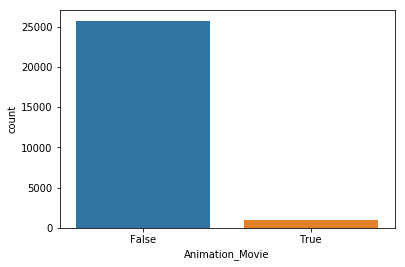

In [111]:
sns.countplot(joined['Animation_Movie'])

In [112]:
yearly_average =joined[['year', 'rating']].groupby('year', as_index=False).mean()

In [113]:
yearly_average[:10]

,year,rating
0,1891,3.000000
1,1893,3.375000
2,1894,3.071429
3,1895,3.125000
4,1896,3.183036
5,1898,3.850000
6,1899,3.625000
7,1900,3.166667
8,1901,5.000000
9,1902,3.738189


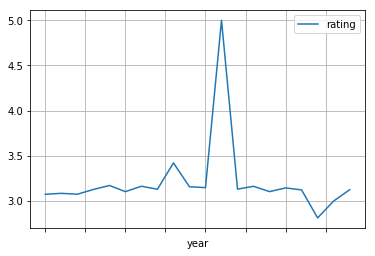

In [114]:
yearly_average[-20:].plot(x='year', y='rating' ,grid=True)